In [2]:
!pip install tensorflow matplotlib

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
print('TensorFlow version:', tf.__version__)

TensorFlow version: 2.18.0


In [24]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = x_train[..., np.newaxis].astype('float32')
x_test = x_test[..., np.newaxis].astype('float32')
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
print('Train shape:', x_train.shape, 'Test shape:', x_test.shape)

Train shape: (60000, 28, 28, 1) Test shape: (10000, 28, 28, 1)


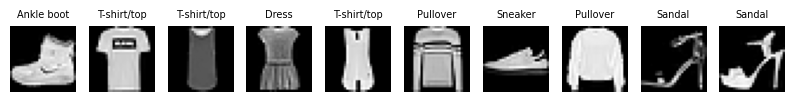

In [25]:
plt.figure(figsize=(10,2))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(x_train[i].reshape(28,28), cmap='gray')
    plt.axis('off')
    plt.title(class_names[y_train[i]], fontsize=7)
plt.show()

In [26]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=5, validation_split=0.1)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 58s 33ms/step - accuracy: 0.7690 - loss: 0.6438 - val_accuracy: 0.8677 - val_loss: 0.3726
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 58s 34ms/step - accuracy: 0.8812 - loss: 0.3250 - val_accuracy: 0.8828 - val_loss: 0.3070
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 80s 33ms/step - accuracy: 0.9021 - loss: 0.2686 - val_accuracy: 0.9017 - val_loss: 0.2746
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 82s 33ms/step - accuracy: 0.9128 - loss: 0.2382 - val_accuracy: 0.9022 - val_loss: 0.2765
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 82s 33ms/step - accuracy: 0.9229 - loss: 0.2070 - val_accuracy: 0.9072 - val_loss: 0.2574


In [27]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.4f}")

313/313 - 2s - 8ms/step - accuracy: 0.9065 - loss: 0.2665
Test accuracy: 0.9065


In [28]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open('fashion_mnist_model.tflite', 'wb') as f:
    f.write(tflite_model)
print('TFLite model saved as fashion_mnist_model.tflite')

Saved artifact at '/tmp/tmpjhg__wxw'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='keras_tensor_8')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  133686275597776: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133686275598352: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133686275596624: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133686275600080: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133686275599504: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133686275600848: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133686275600272: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133686275601616: TensorSpec(shape=(), dtype=tf.resource, name=None)
TFLite model saved as fashion_mnist_model.tflite


In [29]:
interpreter = tf.lite.Interpreter(model_path='fashion_mnist_model.tflite')
interpreter.allocate_tensors()

input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Test on 100 test samples
num_samples = 100
correct = 0
for i in range(num_samples):
    input_data = x_test[i:i+1]
    interpreter.set_tensor(input_details[0]['index'], input_data)
    interpreter.invoke()
    output = interpreter.get_tensor(output_details[0]['index'])
    pred = np.argmax(output)
    if pred == y_test[i]:
        correct += 1
print(f"TFLite model accuracy on {num_samples} samples: {correct/num_samples:.2f}")

TFLite model accuracy on 100 samples: 0.88


In [10]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 60.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 60.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 7.4 MB/s eta 0:00:00


In [11]:
!streamlit run app.py




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.106.120.15:8501

  Stopping...
  Stopping...


In [12]:
!pip install pyngrok

In [15]:
from pyngrok import ngrok


In [30]:
from pyngrok import ngrok
import threading

ngrok.set_auth_token("2i8aHrFZydDHe32IWsNumfyZOcK_2EXmVWCKvFGXZ2EnEZnBv")

# Start Streamlit in a thread
def run():
    !streamlit run app.py --server.enableCORS false --server.enableXsrfProtection false

thread = threading.Thread(target=run)
thread.start()

# Open an ngrok tunnel to the streamlit port 8501
public_url = ngrok.connect("8501")
print('Streamlit app is live at:', public_url)

Streamlit app is live at: NgrokTunnel: "https://95d71ef04fed.ngrok-free.app" -> "http://localhost:8501"
